# Lab 6 Timeseries

Skills
- Reformat dates
- Extract parts of dates
- Visualize timeseries data

Data Source
- https://github.com/fivethirtyeight/uber-tlc-foil-response

Resources
- https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
- https://docs.python.org/2/library/time.html

In [73]:
# import modules
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# Part A: Formatting Dates

In [74]:
# read in data for uber from jul14, aug14, sep14 
# (https://github.com/fivethirtyeight/uber-tlc-foil-response/tree/master/uber-trip-data)
julDF = pd.read_csv('../Downloads/uber-raw-data-jul14.csv')
augDF = pd.read_csv('../Downloads/uber-raw-data-aug14.csv')
sepDF = pd.read_csv('../Downloads/uber-raw-data-sep14.csv')

# print first few lines of each data set
print(julDF.head())
print(augDF.head())
print(sepDF.head())
print(julDF.shape)
print(augDF.shape)
print(sepDF.shape)

          Date/Time      Lat      Lon    Base
0  7/1/2014 0:03:00  40.7586 -73.9706  B02512
1  7/1/2014 0:05:00  40.7605 -73.9994  B02512
2  7/1/2014 0:06:00  40.7320 -73.9999  B02512
3  7/1/2014 0:09:00  40.7635 -73.9793  B02512
4  7/1/2014 0:20:00  40.7204 -74.0047  B02512
          Date/Time      Lat      Lon    Base
0  8/1/2014 0:03:00  40.7366 -73.9906  B02512
1  8/1/2014 0:09:00  40.7260 -73.9918  B02512
2  8/1/2014 0:12:00  40.7209 -74.0507  B02512
3  8/1/2014 0:12:00  40.7387 -73.9856  B02512
4  8/1/2014 0:12:00  40.7323 -74.0077  B02512
          Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512
(796121, 4)
(829275, 4)
(1028136, 4)


In [75]:
# 1 combine uber data into combinedUberDF
# HINT: concat see data wrangling module
combinedUberDF = pd.concat([julDF, augDF, sepDF])

combinedUberDF.head(-10)

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512
...,...,...,...,...
1028121,9/30/2014 22:54:00,40.6932,-73.9693,B02764
1028122,9/30/2014 22:54:00,40.7273,-74.0057,B02764
1028123,9/30/2014 22:54:00,40.7594,-73.9820,B02764
1028124,9/30/2014 22:55:00,40.7520,-74.0027,B02764


In [76]:
# 2 Separate date from time from Date/Time using string split and put them into two new columns 'Date' and 'Time'
combinedUberDF[['Date', 'Time']] = combinedUberDF['Date/Time'].str.split(' ', expand=True)
combinedUberDF.tail()

,Date/Time,Lat,Lon,Base,Date,Time
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764,9/30/2014,22:57:00
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764,9/30/2014,22:57:00
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764,9/30/2014,22:58:00
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764,9/30/2014,22:58:00
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764,9/30/2014,22:58:00


In [77]:
# 3 Using the apply with a lambda function, convert Date into format Year-Month-Day as in 2014-07-04
combinedUberDF['DateYMD'] = combinedUberDF['Date'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y').strftime('%Y-%m-%d'))
combinedUberDF.tail()

,Date/Time,Lat,Lon,Base,Date,Time,DateYMD
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764,9/30/2014,22:57:00,2014-09-30
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764,9/30/2014,22:57:00,2014-09-30
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764,9/30/2014,22:58:00,2014-09-30
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764,9/30/2014,22:58:00,2014-09-30
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764,9/30/2014,22:58:00,2014-09-30


In [78]:
# 4 Convert the Time variable into format 24hr:Min:Sec
combinedUberDF['Time24'] = combinedUberDF['Time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S').strftime('%H:%M:%S'))
combinedUberDF.tail()

,Date/Time,Lat,Lon,Base,Date,Time,DateYMD,Time24
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764,9/30/2014,22:57:00,2014-09-30,22:57:00
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764,9/30/2014,22:57:00,2014-09-30,22:57:00
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764,9/30/2014,22:58:00,2014-09-30,22:58:00
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764,9/30/2014,22:58:00,2014-09-30,22:58:00
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764,9/30/2014,22:58:00,2014-09-30,22:58:00


In [79]:
# Read in data for American, Carmel, Dial
# https://github.com/fivethirtyeight/uber-tlc-foil-response/tree/master/other-FHV-data
americanDF = pd.read_csv('../Downloads/American_B01362.csv', encoding="ISO-8859-1")
carmelDF = pd.read_csv('../Downloads/Carmel_B00256.csv', encoding="ISO-8859-1")
dialDF = pd.read_csv('../Downloads/Dial7_B00887.csv', encoding="ISO-8859-1")
print(americanDF.head())
print("*****************************")
print(carmelDF.head())
print("*****************************")
print(dialDF.tail())

       DATE         TIME                  PICK UP ADDRESS  Unnamed: 3  \
0  7/1/2014  12:00:00 AM    874 E 139th St Mott Haven, BX         NaN   
1  7/1/2014  12:01:00 AM    628 E 141st St Mott Haven, BX         NaN   
2  7/1/2014  12:01:00 AM   601 E 156th St South Bronx, BX         NaN   
3  7/1/2014  12:01:00 AM    708 E 138th St Mott Haven, BX         NaN   
4  7/1/2014  12:02:00 AM    700 E 140th St Mott Haven, BX         NaN   

   Unnamed: 4  Unnamed: 5  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  
*****************************
       Date  Time        PU_Adress Base_No
0  7/1/2014  0:00  260 W 44 St NYC  B00256
1  7/1/2014  0:00  125 W 29 St Nyc  B00256
2  7/1/2014  0:00  141 W 28 St Nyc  B00256
3  7/1/2014  0:01              EWR  B00256
4  7/1/2014  0:07              JFK  B00256
*****************************
              Date   Time                                              Stat

In [80]:
print(americanDF.head())

       DATE         TIME                  PICK UP ADDRESS  Unnamed: 3  \
0  7/1/2014  12:00:00 AM    874 E 139th St Mott Haven, BX         NaN   
1  7/1/2014  12:01:00 AM    628 E 141st St Mott Haven, BX         NaN   
2  7/1/2014  12:01:00 AM   601 E 156th St South Bronx, BX         NaN   
3  7/1/2014  12:01:00 AM    708 E 138th St Mott Haven, BX         NaN   
4  7/1/2014  12:02:00 AM    700 E 140th St Mott Haven, BX         NaN   

   Unnamed: 4  Unnamed: 5  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  


In [81]:
# 5 Format American Data
# Combine DATE and TIME columns to one DateTime  "07-01-2014 01:14:00"
americanDF['DateTime'] = americanDF['DATE'] + ' ' + americanDF['TIME']
americanDF['DateTime'] = americanDF['DateTime'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p').strftime('%m-%d-%Y %H:%M:%S'))
americanDF.head()

,DATE,TIME,PICK UP ADDRESS,Unnamed: 3,Unnamed: 4,Unnamed: 5,DateTime
0,7/1/2014,12:00:00 AM,"874 E 139th St Mott Haven, BX",NaN,NaN,NaN,07-01-2014 00:00:00
1,7/1/2014,12:01:00 AM,"628 E 141st St Mott Haven, BX",NaN,NaN,NaN,07-01-2014 00:01:00
2,7/1/2014,12:01:00 AM,"601 E 156th St South Bronx, BX",NaN,NaN,NaN,07-01-2014 00:01:00
3,7/1/2014,12:01:00 AM,"708 E 138th St Mott Haven, BX",NaN,NaN,NaN,07-01-2014 00:01:00
4,7/1/2014,12:02:00 AM,"700 E 140th St Mott Haven, BX",NaN,NaN,NaN,07-01-2014 00:02:00


In [82]:
# 6 Format Carmel Data
# Combine DATE and TIME columns to one DateTime  "07-01-2014 01:14:00"
carmelDF['DateTime'] = carmelDF['Date'] + ' ' + carmelDF['Time']
carmelDF['DateTime'] = carmelDF['DateTime'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M').strftime('%m-%d-%Y %H:%M:%S'))
carmelDF.head()

,Date,Time,PU_Adress,Base_No,DateTime
0,7/1/2014,0:00,260 W 44 St NYC,B00256,07-01-2014 00:00:00
1,7/1/2014,0:00,125 W 29 St Nyc,B00256,07-01-2014 00:00:00
2,7/1/2014,0:00,141 W 28 St Nyc,B00256,07-01-2014 00:00:00
3,7/1/2014,0:01,EWR,B00256,07-01-2014 00:01:00
4,7/1/2014,0:07,JFK,B00256,07-01-2014 00:07:00


In [83]:
# 7 Format Dial Data 
# Combine DATE and TIME columns to one DateTime  "07-01-2014 01:14:00"
dialDF['DateTime'] = dialDF['Date'] + ' ' + dialDF['Time']
dialDF['DateTime'] = dialDF['DateTime'].apply(lambda x: datetime.datetime.strptime(x, '%Y.%m.%d %H:%M').strftime('%m-%d-%Y %H:%M:%S'))
dialDF.head()


,Date,Time,State,PuFrom,Address,Street,DateTime
0,2014.07.06,14:30,NY ...,MANHATTAN,50,MURRAY ST,07-06-2014 14:30:00
1,2014.07.04,7:15,NY ...,MANHATTAN,143,AVENUE B,07-04-2014 07:15:00
2,2014.07.05,5:45,NY ...,MANHATTAN,125,CHRISTOPHER ST,07-05-2014 05:45:00
3,2014.07.06,4:30,NY ...,MANHATTAN,217,E 7 ST,07-06-2014 04:30:00
4,2014.07.05,7:45,NY ...,MANHATTAN,521,W 26 ST,07-05-2014 07:45:00


# Part B: Visualize Timeseries Data

## Visualize by part of date for Uber Data Set

In [84]:
combinedUberDF.head()

,Date/Time,Lat,Lon,Base,Date,Time,DateYMD,Time24
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,7/1/2014,0:03:00,2014-07-01,00:03:00
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,7/1/2014,0:05:00,2014-07-01,00:05:00
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,7/1/2014,0:06:00,2014-07-01,00:06:00
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,7/1/2014,0:09:00,2014-07-01,00:09:00
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,7/1/2014,0:20:00,2014-07-01,00:20:00


In [85]:
# 8 Using the combinedUberDF from above calculate day of the week for uber data set 
#     and put it in a new varialbe 'DayOfWeek'. The value should be an integer.
combinedUberDF['DayOfWeek'] = combinedUberDF['Date/Time'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %H:%M:%S').weekday())
combinedUberDF.head()

,Date/Time,Lat,Lon,Base,Date,Time,DateYMD,Time24,DayOfWeek
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,7/1/2014,0:03:00,2014-07-01,00:03:00,1
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,7/1/2014,0:05:00,2014-07-01,00:05:00,1
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,7/1/2014,0:06:00,2014-07-01,00:06:00,1
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,7/1/2014,0:09:00,2014-07-01,00:09:00,1
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,7/1/2014,0:20:00,2014-07-01,00:20:00,1


In [101]:
# 9 Aggregate by Day of the Week for the count
# HINT: remember to fix the index and rename the columns to DayOfWeek and NumTrips
# Day of Week: 0 = Monday, 1 = Tuesday, 2 = Wednesday etc...
dowDF = combinedUberDF[['DayOfWeek', 'Date/Time']].groupby('DayOfWeek').agg('count')
dowDF = dowDF.reset_index()
dowDF.columns = ['DayOfWeek', 'NumTrips']
dowDF.head(7)



,DayOfWeek,NumTrips
0,0,322110
1,1,407808
2,2,398346
3,3,425832
4,4,411789
5,5,384542
6,6,303105


<AxesSubplot:xlabel='Day of Week', ylabel='Number of Trips'>

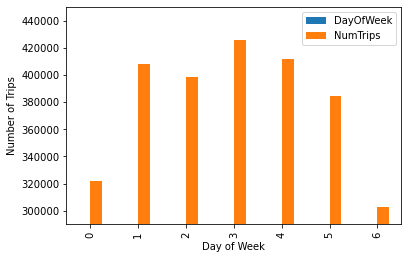

In [87]:
# 10 Create a bar graph of Day of the Week by number of trips and give each bar a different color. 
#    Make the y axis limited between 290,000 and 450,000.
dowDF[['DayOfWeek', 'NumTrips']].plot(kind="bar", xlabel="Day of Week", ylabel="Number of Trips", ylim=(290000, 450000))


In [88]:
# 11 Calculate hour of the day for uber data set and put it in a new variable 'HourOfDay'
combinedUberDF['HourOfDay'] = combinedUberDF['Date/Time'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %H:%M:%S').hour)
combinedUberDF.head()


,Date/Time,Lat,Lon,Base,Date,Time,DateYMD,Time24,DayOfWeek,HourOfDay
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,7/1/2014,0:03:00,2014-07-01,00:03:00,1,0
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,7/1/2014,0:05:00,2014-07-01,00:05:00,1,0
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,7/1/2014,0:06:00,2014-07-01,00:06:00,1,0
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,7/1/2014,0:09:00,2014-07-01,00:09:00,1,0
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,7/1/2014,0:20:00,2014-07-01,00:20:00,1,0


In [89]:
# 12 Aggregate by hour of day and set the columns to 'Hour' and 'NumTrips' and reset the index
hourDF = combinedUberDF[['HourOfDay','Date/Time']].groupby('HourOfDay').agg('count')
hourDF = hourDF.reset_index()
hourDF.columns = ['Hour','NumTrips']
hourDF.head()


,Hour,NumTrips
0,0,63537
1,1,42105
2,2,29369
3,3,30364
4,4,34489


<AxesSubplot:xlabel='HourOfDay', ylabel='Number of Trips'>

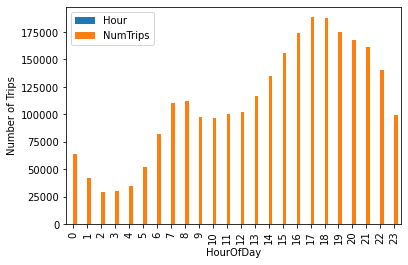

In [90]:
# 13 create a bar graph of hour of day by number of trips
hourDF.plot(kind='bar', xlabel="HourOfDay", ylabel="Number of Trips")


## aggregate at different time periods by setting date as index

In [91]:
# 14 If it's not already done, set Date as the the index for combinedUberDF. Make sure to use 'to_datetime' on the variable
combinedUberDF['Date'] = pd.to_datetime(combinedUberDF['Date'])
combinedUberDF = combinedUberDF.set_index('Date')
combinedUberDF.head()

,Date/Time,Lat,Lon,Base,Time,DateYMD,Time24,DayOfWeek,HourOfDay
Date,,,,,,,,,
2014-07-01,7/1/2014 0:03:00,40.7586,-73.9706,B02512,0:03:00,2014-07-01,00:03:00,1,0
2014-07-01,7/1/2014 0:05:00,40.7605,-73.9994,B02512,0:05:00,2014-07-01,00:05:00,1,0
2014-07-01,7/1/2014 0:06:00,40.7320,-73.9999,B02512,0:06:00,2014-07-01,00:06:00,1,0
2014-07-01,7/1/2014 0:09:00,40.7635,-73.9793,B02512,0:09:00,2014-07-01,00:09:00,1,0
2014-07-01,7/1/2014 0:20:00,40.7204,-74.0047,B02512,0:20:00,2014-07-01,00:20:00,1,0


In [92]:
# 15 by setting date as an index there are special functions for aggregating datetime indices
# group by day - get counts using the resample function
# resample('D') - 'D' asks it to group by day
# count - asks it to count the number of rows
dayDF = combinedUberDF.resample('D').count()
dayDF.head()

,Date/Time,Lat,Lon,Base,Time,DateYMD,Time24,DayOfWeek,HourOfDay
Date,,,,,,,,,
2014-07-01,21228,21228,21228,21228,21228,21228,21228,21228,21228
2014-07-02,26480,26480,26480,26480,26480,26480,26480,26480,26480
2014-07-03,21597,21597,21597,21597,21597,21597,21597,21597,21597
2014-07-04,14148,14148,14148,14148,14148,14148,14148,14148,14148
2014-07-05,10890,10890,10890,10890,10890,10890,10890,10890,10890


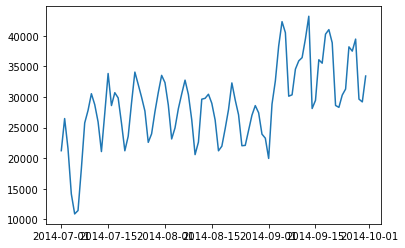

In [93]:
# 16 plot uber usage per day over time as a line graph 
plt.plot(dayDF.index,dayDF['Time'])


In [98]:
# 17 Group by week instead of day and calculate mean instead of count
# 'W' - groups by week instead of day
weekDF = dayDF.resample('W').mean()
weekDF.head()

,Date/Time,Lat,Lon,Base,Time,DateYMD,Time24,DayOfWeek,HourOfDay
Date,,,,,,,,,
2014-07-06,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000
2014-07-13,25453.000000,25453.000000,25453.000000,25453.000000,25453.000000,25453.000000,25453.000000,25453.000000,25453.000000
2014-07-20,28187.142857,28187.142857,28187.142857,28187.142857,28187.142857,28187.142857,28187.142857,28187.142857,28187.142857
2014-07-27,28429.000000,28429.000000,28429.000000,28429.000000,28429.000000,28429.000000,28429.000000,28429.000000,28429.000000
2014-08-03,28575.428571,28575.428571,28575.428571,28575.428571,28575.428571,28575.428571,28575.428571,28575.428571,28575.428571


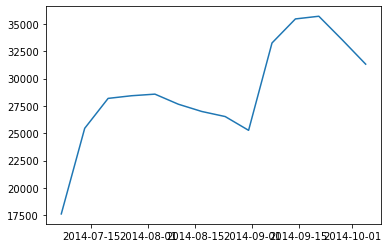

In [99]:
# 18 plot uber usage per week over time as a line graph using the dataframe from the previous cell
plt.plot(weekDF.index,weekDF['Time'])